# This notebook uses a logistic regression model to predict whether or not a campaign will be successful on KickStarter.

In [1]:
# Key Takeaways from the model:

# A Kickstarter campaign is more likely to be successful then fail. 
# The model was 83% accurate.

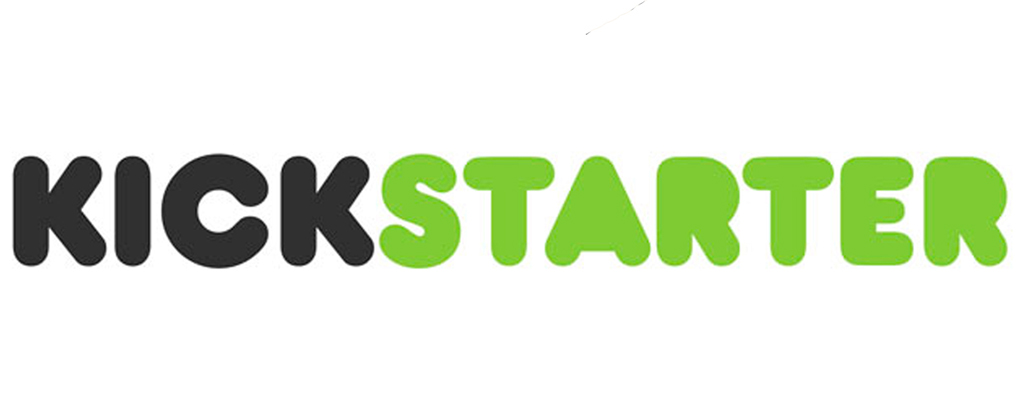

In [2]:
from IPython.display import Image
Image(filename='kickstarter.jpg', width = 500, height = 200)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('ks_projects.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
newdf = df[df.main_category.isin(["Music", "Publishing"]) & df.state.isin(['failed', 'canceled'])]
newdf.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,5.180400e+04,51804,51804,51804,51804,51804,5.180400e+04,51804,5.180400e+04,51804,51804.000000,51804,51710.000000,51804.000000,5.180400e+04
unique,NaN,51633,36,2,14,2976,NaN,51799,NaN,2,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Music,Publishing,USD,2014-08-08,NaN,2013-07-08 21:24:39,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,14,6929,26747,42796,92,NaN,2,NaN,44897,NaN,42730,NaN,NaN,NaN
mean,1.075038e+09,NaN,NaN,NaN,NaN,NaN,3.158458e+04,NaN,6.876723e+02,NaN,9.497992,NaN,544.681861,624.251924,2.789316e+04
std,6.187853e+08,NaN,NaN,NaN,NaN,NaN,9.169736e+05,NaN,6.402192e+03,NaN,28.958911,NaN,2535.434070,2659.195213,7.758601e+05
min,1.852000e+04,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,1.000000e-02
25%,5.384752e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,2.000000e+03
50%,1.072952e+09,NaN,NaN,NaN,NaN,NaN,5.000000e+03,NaN,5.500000e+01,NaN,2.000000,NaN,40.000000,55.000000,5.000000e+03
75%,1.611579e+09,NaN,NaN,NaN,NaN,NaN,1.100000e+04,NaN,3.920000e+02,NaN,8.000000,NaN,310.000000,387.955000,1.100000e+04


In [6]:
# Columns don't have any missing values.
df.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


In [7]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
# Mapping categorical variables in state column.
# failed  = 0, successful = 1, canceled = 2, undefined = 3, live = 4, suspended = 5
df.replace(to_replace={'state': {'failed': 0, 
                                 'successful': 1, 
                                 'canceled': 2, 
                                 'undefined': 3,
                                 'live': 4,
                                 'suspended': 5}}, inplace=True)

In [9]:
# Dropping ID column as there are too many unique values.
del df['ID']

In [10]:
# Dropping name column as there are too many unique values.
del df['name']

In [11]:
# Dropping category column as there are too many unique values.
del df['category']

In [12]:
# launched column has too many unique values, so it may be useful to look at it by year.
df['launched_year'] = df['launched'].str.split('-').str[0]
df.head()

,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
0,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015
1,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017
2,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013
3,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012
4,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,2,14,US,1283.0,1283.0,19500.00,2015


In [13]:
# launched column by year has 11 unique values instead of the 378,089 unique values in the launched column.
df.describe(include='all')

,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
count,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661.000000,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05,378661
unique,15,14,3164,NaN,378089,NaN,NaN,NaN,23,NaN,NaN,NaN,11
top,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,NaN,NaN,US,NaN,NaN,NaN,2015
freq,63585,295365,705,NaN,7,NaN,NaN,NaN,292627,NaN,NaN,NaN,77300
mean,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,0.640747,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04,NaN
std,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,0.823200,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06,NaN
min,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02,NaN
25%,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,0.000000,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03,NaN
50%,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,0.000000,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03,NaN
75%,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,1.000000,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04,NaN


In [14]:
# Deleting launched column.
del df['launched']

In [15]:
# deadline column has too many unique values, so it may be useful to look at it by year.
df['deadline_year'] = df['deadline'].str.split('-').str[0]
df.head()

,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,deadline_year
0,Publishing,GBP,2015-10-09,1000.0,0.0,0,0,GB,0.0,0.0,1533.95,2015,2015
1,Film & Video,USD,2017-11-01,30000.0,2421.0,0,15,US,100.0,2421.0,30000.00,2017,2017
2,Film & Video,USD,2013-02-26,45000.0,220.0,0,3,US,220.0,220.0,45000.00,2013,2013
3,Music,USD,2012-04-16,5000.0,1.0,0,1,US,1.0,1.0,5000.00,2012,2012
4,Film & Video,USD,2015-08-29,19500.0,1283.0,2,14,US,1283.0,1283.0,19500.00,2015,2015


In [16]:
# Deleting deadline column.
del df['deadline']

In [17]:
df.dtypes

main_category        object
currency             object
goal                float64
pledged             float64
state                 int64
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
launched_year        object
deadline_year        object
dtype: object

In [18]:
# Changing column types of launched_year and deadline_year from an object to a float.
df['launched_year'] = df.launched_year.astype('float')
df['deadline_year'] = df.deadline_year.astype('float')

In [19]:
df.dtypes

main_category        object
currency             object
goal                float64
pledged             float64
state                 int64
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
launched_year       float64
deadline_year       float64
dtype: object

In [27]:
df2 = df[((df["country"]=="GB") & (df["country"]="US")) | (df["backers"]>=1237)]
df2.describe(include='all')

,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,deadline_year
count,38123,38123,3.812300e+04,3.812300e+04,38123.000000,38123.000000,38123,3.812300e+04,3.812300e+04,3.812300e+04,38123.000000,38123.000000
unique,15,12,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
top,Film & Video,GBP,NaN,NaN,NaN,NaN,GB,NaN,NaN,NaN,NaN,NaN
freq,6083,33672,NaN,NaN,NaN,NaN,33672,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.335098e+04,4.414987e+04,0.686698,526.284212,NaN,3.259294e+04,4.413564e+04,4.589325e+04,2014.910395,2014.974504
std,NaN,NaN,7.942170e+05,2.877411e+05,0.783732,2796.636875,NaN,2.410529e+05,2.788525e+05,1.257606e+06,1.413285,1.415004
min,NaN,NaN,1.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e+00,2009.000000,2009.000000
25%,NaN,NaN,1.000000e+03,3.100000e+01,0.000000,2.000000,NaN,2.248000e+01,4.732000e+01,1.565460e+03,2014.000000,2014.000000
50%,NaN,NaN,4.500000e+03,5.680000e+02,1.000000,17.000000,NaN,4.824000e+02,8.442400e+02,6.256060e+03,2015.000000,2015.000000
75%,NaN,NaN,1.500000e+04,4.934000e+03,1.000000,94.000000,NaN,4.628935e+03,7.050920e+03,2.000000e+04,2016.000000,2016.000000


In [19]:
df['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [20]:
# Mapping categorical variables in currency column.
df.replace(to_replace={'currency': {'USD': 0, 
                                    'GBP': 1, 
                                    'EUR': 2, 
                                    'CAD': 3,
                                    'AUD': 4,
                                    'SEK': 5,
                                    'MXN': 6,
                                    'NZD': 7,
                                    'DKK': 8,
                                    'CHF': 9,
                                    'NOK': 10,
                                    'HKD': 11,
                                    'SGD': 12,
                                    'JPY': 13}}, inplace=True)

In [21]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [22]:
# Mapping categorical variables in main_category column.
df.replace(to_replace={'main_category': {'Film & Video': 0, 
                                    'Music': 1, 
                                    'Publishing': 2, 
                                    'Games': 3,
                                    'Technology': 4,
                                    'Design': 5,
                                    'Art': 6,
                                    'Food': 7,
                                    'Fashion': 8,
                                    'Theater': 9,
                                    'Comics': 10,
                                    'Photography': 11,
                                    'Crafts': 12,
                                    'Journalism': 13,
                                    'Dance': 14}}, inplace=True)

In [23]:
# Will replaced N,0" value in country column with undefined. 
df['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [24]:
df = df.replace({'country':{'N,0"':'undefined'}})
df['country'].value_counts()

US           292627
GB            33672
CA            14756
AU             7839
DE             4171
undefined      3797
FR             2939
IT             2878
NL             2868
ES             2276
SE             1757
MX             1752
NZ             1447
DK             1113
IE              811
CH              761
NO              708
HK              618
BE              617
AT              597
SG              555
LU               62
JP               40
Name: country, dtype: int64

In [25]:
# Mapping categorical variables in country column.
df.replace(to_replace={'country': {'US': 0, 
                                    'GB': 1, 
                                    'CA': 2, 
                                    'AU': 3,
                                    'DE': 4,
                                    'undefined': 5,
                                    'FR': 6,
                                    'IT': 7,
                                    'NL': 8,
                                    'ES': 9,
                                    'SE': 10,
                                    'MX': 11,
                                    'NZ': 12,
                                    'DK': 13,
                                    'IE': 14,
                                    'CH': 15,
                                    'NO': 16,
                                    'HK': 17,
                                    'BE': 18,
                                    'AT': 19,
                                    'SG': 20,
                                    'LU': 21,
                                    'JP': 22}}, inplace=True)

In [26]:
df

,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,deadline_year
0,2,1,1000.0,0.00,0,0,1,0.00,0.00,1533.95,2015.0,2015.0
1,0,0,30000.0,2421.00,0,15,0,100.00,2421.00,30000.00,2017.0,2017.0
2,0,0,45000.0,220.00,0,3,0,220.00,220.00,45000.00,2013.0,2013.0
3,1,0,5000.0,1.00,0,1,0,1.00,1.00,5000.00,2012.0,2012.0
4,0,0,19500.0,1283.00,2,14,0,1283.00,1283.00,19500.00,2015.0,2015.0
5,7,0,50000.0,52375.00,1,224,0,52375.00,52375.00,50000.00,2016.0,2016.0
6,7,0,1000.0,1205.00,1,16,0,1205.00,1205.00,1000.00,2014.0,2014.0
7,7,0,25000.0,453.00,0,40,0,453.00,453.00,25000.00,2016.0,2016.0
8,5,0,125000.0,8233.00,2,58,0,8233.00,8233.00,125000.00,2014.0,2014.0
9,0,0,65000.0,6240.57,2,43,0,6240.57,6240.57,65000.00,2014.0,2014.0


In [27]:
df2 = df.dropna()

In [28]:
X = df2.drop('state', axis = 1)
y = df2['state']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, predictions) #Confusion matrix.

array([[58092,   470,   448,     2,    60],
       [ 5015, 35249,     0,     0,     0],
       [11293,   254,   161,     1,    30],
       [  688,   140,     3,     2,     1],
       [  462,    85,     4,     0,     0]], dtype=int64)

In [33]:
# failed  = 0, successful = 1, canceled = 2, undefined = 3, live = 4, suspended = 5
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     59072
           1       0.97      0.88      0.92     40264
           2       0.26      0.01      0.03     11739
           4       0.40      0.00      0.00       834
           5       0.00      0.00      0.00       551

    accuracy                           0.83    112460
   macro avg       0.48      0.37      0.36    112460
weighted avg       0.78      0.83      0.79    112460

